In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.11.0.dev20210928
True


In [2]:
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)#Download Dataset

In [4]:
dataset #know the dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [5]:
test_data = MNIST(root='data/',train=False)
len(test_data)

10000

In [6]:
dataset[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x1996147A5B0>, 0)

In [7]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  0


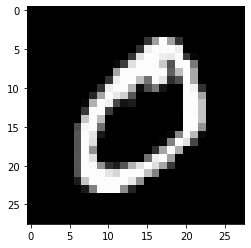

In [9]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label: ',label)

In [10]:
import torchvision.transforms as transforms #Convert Image into tensors

In [11]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [12]:
img_tensor,label=dataset[1]    
print(img_tensor.shape,label)   #Its gray scale so its 28 X 28 image with 1 colour

torch.Size([1, 28, 28]) 0


In [13]:
# We must have training and validation dataset use to evaluate model during training
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
# Now train Model
import torch.nn as nn
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [16]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb):#xb = batch of inputs and self points to model
        xb = xb.reshape(-1, 28*28)
        out = self.linear(xb)#now xb is flattened manually to give input as a model
        return out
model = MnistModel()

In [17]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0128,  0.0214, -0.0201,  ...,  0.0308,  0.0285, -0.0075],
         [ 0.0324,  0.0089,  0.0177,  ...,  0.0212, -0.0196, -0.0154],
         [ 0.0066,  0.0212, -0.0166,  ..., -0.0123, -0.0257,  0.0242],
         ...,
         [ 0.0307, -0.0013, -0.0036,  ..., -0.0340,  0.0062,  0.0219],
         [-0.0089, -0.0113,  0.0183,  ...,  0.0318,  0.0136, -0.0103],
         [ 0.0290, -0.0344,  0.0347,  ..., -0.0051,  0.0072, -0.0139]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0355, -0.0002,  0.0213,  0.0309, -0.0079, -0.0049, -0.0158,  0.0248,
          0.0108, -0.0197], requires_grad=True)]

In [18]:
for images, labels in train_loader:
    outputs = model(images)
    break
print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 10])
tensor([[ 0.1371,  0.5002, -0.2090, -0.3524, -0.1311,  0.0690, -0.3368, -0.3099,
         -0.2028,  0.2207],
        [-0.1280,  0.1001,  0.0265, -0.1696, -0.1177,  0.1541,  0.0008, -0.2950,
         -0.0982,  0.0629]])


In [19]:
outputs[0]

tensor([ 0.1371,  0.5002, -0.2090, -0.3524, -0.1311,  0.0690, -0.3368, -0.3099,
        -0.2028,  0.2207], grad_fn=<SelectBackward0>)

In [20]:
exps = torch.exp(outputs[0])
exps

tensor([1.1470, 1.6490, 0.8114, 0.7030, 0.8771, 1.0715, 0.7141, 0.7335, 0.8165,
        1.2469], grad_fn=<ExpBackward0>)

In [21]:
# Above cell and this Cell explain hows softmax work
probs = exps/torch.sum(exps)
print(probs)
print(probs.sum())

tensor([0.1174, 0.1688, 0.0831, 0.0720, 0.0898, 0.1097, 0.0731, 0.0751, 0.0836,
        0.1276], grad_fn=<DivBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)


In [22]:
# Now probability of output should lie in 0 to 1 scale so we are using Softmax function
import torch.nn.functional as F
prob = F.softmax(outputs, dim=1)#aplly softmax for each ouput row
print("Sample probabilities\n",prob[:2].data)

#check sum of probabilities is 1
print("sum: ", torch.sum(prob[0]).item())

Sample probabilities
 tensor([[0.1174, 0.1688, 0.0831, 0.0720, 0.0898, 0.1097, 0.0731, 0.0751, 0.0836,
         0.1276],
        [0.0914, 0.1148, 0.1067, 0.0877, 0.0923, 0.1212, 0.1039, 0.0773, 0.0942,
         0.1106]])
sum:  1.0


In [23]:
max_probs, preds = torch.max(prob, dim=1)
print(preds)
print(max_probs)

tensor([1, 5, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 8, 1, 9, 1, 0,
        1, 1, 1, 1, 1, 2, 6, 9, 0, 2, 6, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 9,
        1, 9, 9, 1, 8, 1, 1, 9, 1, 0, 2, 1, 1, 1, 9, 1, 1, 1, 2, 2, 1, 1, 1, 5,
        1, 9, 2, 1, 1, 1, 1, 9, 1, 0, 9, 9, 1, 1, 1, 9, 1, 1, 1, 1, 2, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 7, 1, 5, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 2, 1, 2])
tensor([0.1688, 0.1212, 0.1319, 0.1303, 0.1106, 0.1630, 0.1446, 0.1359, 0.1590,
        0.1256, 0.1491, 0.1531, 0.1488, 0.1296, 0.1394, 0.1317, 0.1728, 0.1172,
        0.1231, 0.1285, 0.1480, 0.1203, 0.1227, 0.1292, 0.1584, 0.1437, 0.1535,
        0.1838, 0.1509, 0.1477, 0.1261, 0.1519, 0.1095, 0.1320, 0.1196, 0.1352,
        0.1316, 0.1460, 0.1415, 0.1230, 0.1482, 0.1222, 0.1307, 0.1287, 0.1411,
        0.1220, 0.1466, 0.1269, 0.1422, 0.1389, 0.1412, 0.1743, 0.1186, 0.1383,
        0.1141, 0.1218, 0.1437, 0.1405, 0.1233, 0.1264, 0.1312, 0.1261, 0.1179,
       

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [25]:
accuracy(outputs, labels)

tensor(0.0703)

In [26]:
loss_fn = F.cross_entropy

In [27]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3473, grad_fn=<NllLossBackward0>)


In [28]:
# Training The model
'''
generic prediction
calculate loss
compte gradiet
update weight
reset the gradient 
repeate the steps and valuate at every epoch 
'''

'\ngeneric prediction\ncalculate loss\ncompte gradiet\nupdate weight\nreset the gradient \nrepeate the steps and valuate at every epoch \n'

In [37]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [38]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [39]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.341200351715088, 'val_acc': 0.06655459105968475}

In [40]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9648, val_acc: 0.6247
Epoch [1], val_loss: 1.6910, val_acc: 0.7330
Epoch [2], val_loss: 1.4866, val_acc: 0.7659
Epoch [3], val_loss: 1.3322, val_acc: 0.7862
Epoch [4], val_loss: 1.2135, val_acc: 0.7976


In [41]:
history2 = fit(10, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2032, val_acc: 0.7987
Epoch [1], val_loss: 1.1932, val_acc: 0.7993
Epoch [2], val_loss: 1.1833, val_acc: 0.8004
Epoch [3], val_loss: 1.1737, val_acc: 0.8010
Epoch [4], val_loss: 1.1644, val_acc: 0.8015
Epoch [5], val_loss: 1.1552, val_acc: 0.8019
Epoch [6], val_loss: 1.1462, val_acc: 0.8024
Epoch [7], val_loss: 1.1375, val_acc: 0.8033
Epoch [8], val_loss: 1.1289, val_acc: 0.8039
Epoch [9], val_loss: 1.1205, val_acc: 0.8052


In [42]:
history3 = fit(10, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7306, val_acc: 0.8432
Epoch [1], val_loss: 0.6080, val_acc: 0.8567
Epoch [2], val_loss: 0.5457, val_acc: 0.8649
Epoch [3], val_loss: 0.5070, val_acc: 0.8699
Epoch [4], val_loss: 0.4804, val_acc: 0.8745
Epoch [5], val_loss: 0.4604, val_acc: 0.8777
Epoch [6], val_loss: 0.4451, val_acc: 0.8804
Epoch [7], val_loss: 0.4322, val_acc: 0.8821
Epoch [8], val_loss: 0.4220, val_acc: 0.8851
Epoch [9], val_loss: 0.4129, val_acc: 0.8860


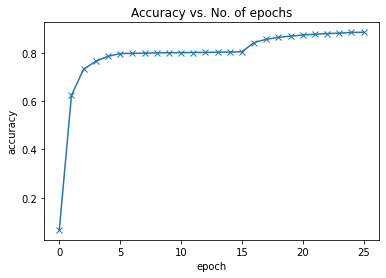

In [44]:
history = [result0] + history1 + history2 + history3 
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [45]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


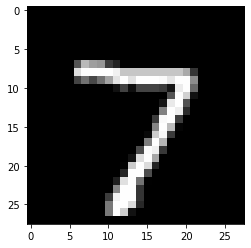

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [48]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 0 , Predicted: 0


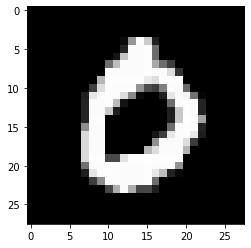

In [50]:
img, label = test_dataset[3]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


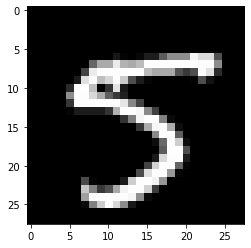

In [51]:
img, label = test_dataset[102]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


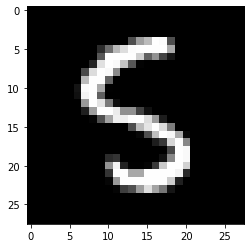

In [52]:
img, label = test_dataset[1235]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


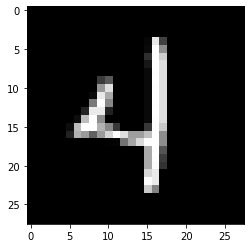

In [53]:
img, label = test_dataset[8616]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [54]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [55]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0340,  0.0216,  0.0083,  ..., -0.0257, -0.0166,  0.0353],
                      [-0.0216, -0.0033,  0.0092,  ..., -0.0215, -0.0337,  0.0261],
                      [-0.0014,  0.0348, -0.0065,  ...,  0.0260, -0.0298, -0.0298],
                      ...,
                      [ 0.0148,  0.0227, -0.0311,  ...,  0.0259,  0.0207, -0.0169],
                      [ 0.0085,  0.0232,  0.0262,  ..., -0.0107, -0.0024,  0.0212],
                      [-0.0320,  0.0344, -0.0280,  ..., -0.0209,  0.0310, -0.0058]])),
             ('linear.bias',
              tensor([-0.0705,  0.2173, -0.0156, -0.0513,  0.0728,  0.2295, -0.0178,  0.1634,
                      -0.2844, -0.0748]))])